# Drug Persistency and Medical Adherence
Team Name: Feature Transformers
Team members:
- Name: Wangu Ndungu
- Email: nwangu349@gmail.com
- Country: Kenya
- College/Company: Kenyatta University
- Specialization: Data Science

- Name: Nikola Andrejić
- Email: nikola.ing.nl@gmail.com
- Country: Serbia
- College/Company: University of Niš
- Specialization: Data Science


## PROBLEM STATEMENT
According to the World Health Organisation, only 50-70% of patients adhere properly to prescribed drugs during therapy. This is especially true among those with long term medication.
This worrying statistic is caused by various factors, for example: patient’s condition or disease,
their socio-economic status, confusion by the schedule, forgetting, discontinuing because they
feel better, just to name a few. Medical non-adherence can lead to devastating consequences
on one’s health, especially those with chronic illnesses.
The purpose of this project is to study trends among patients in a sample and build a model
that’ll classify a new patient as Persistent or Non-Persistent.
This project will givemedical practitioners(especially pharmaceuticals) insight on which patients might require more rigorous follow-ups to ensure they will adhere to their prescriptions.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
%matplotlib inline

### Importing the data

In [2]:
df = pd.read_excel('C:/Users/user/Drug percistency/Healthcare_dataset.xlsx', sheet_name='Dataset')
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


### Data attributes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

This dataset has a total of 68 variables, Percistency_Flag being our target variable. 67 of these attributes are categorical and 2 of the are continuous.

### Checking for missing data

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Ptid
False    3424
Name: Ptid, dtype: int64

Persistency_Flag
False    3424
Name: Persistency_Flag, dtype: int64

Gender
False    3424
Name: Gender, dtype: int64

Race
False    3424
Name: Race, dtype: int64

Ethnicity
False    3424
Name: Ethnicity, dtype: int64

Region
False    3424
Name: Region, dtype: int64

Age_Bucket
False    3424
Name: Age_Bucket, dtype: int64

Ntm_Speciality
False    3424
Name: Ntm_Speciality, dtype: int64

Ntm_Specialist_Flag
False    3424
Name: Ntm_Specialist_Flag, dtype: int64

Ntm_Speciality_Bucket
False    3424
Name: Ntm_Speciality_Bucket, dtype: int64

Gluco_Record_Prior_Ntm
False    3424
Name: Gluco_Record_Prior_Ntm, dtype: int64

Gluco_Record_During_Rx
False    3424
Name: Gluco_Record_During_Rx, dtype: int64

Dexa_Freq_During_Rx
False    3424
Name: Dexa_Freq_During_Rx, dtype: int64

Dexa_During_Rx
False    3424
Name: Dexa_During_Rx, dtype: int64

Frag_Frac_Prior_Ntm
False    3424
Name: Frag_Frac_Prior_Ntm, dtype: int64

Frag_Frac_During_Rx
False    3424
N

There is no missing data in the dataset

### Checking for Outliers
##### Numerical values

Lets visualize the column 'Dexa_Freq_During_Rx' with a box plot

<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

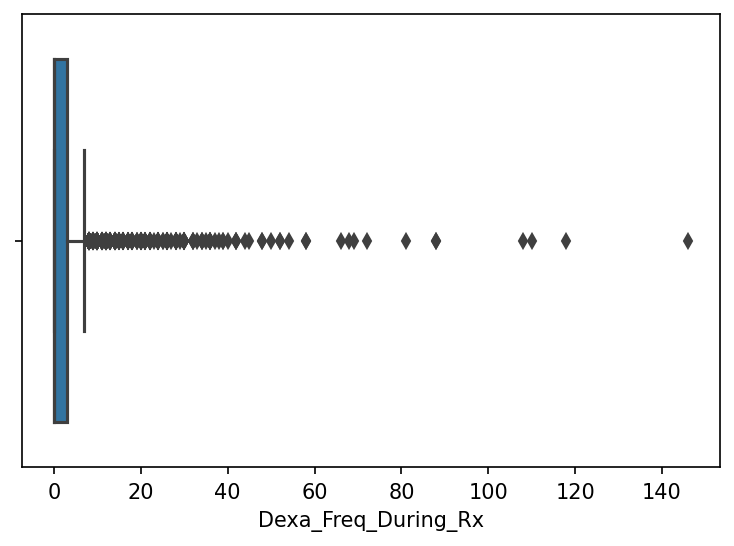

In [7]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x=df['Dexa_Freq_During_Rx'])

We can see there's a couple of outliers between 10 and 150

<AxesSubplot:xlabel='Dexa_Freq_During_Rx', ylabel='Density'>

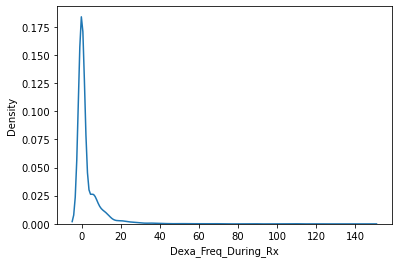

In [8]:
sns.kdeplot(x=df["Dexa_Freq_During_Rx"])

The data is heavily positively skewed. We shall use the .skew() function to find out the exact extent.

In [9]:
print(skew(df['Dexa_Freq_During_Rx']))

6.805747051718919


We shall apply log transformation to deal with this and replace the column with the log-transformmed version

In [10]:
df["Dexa_Freq_During_Rx_Log"] = df['Dexa_Freq_During_Rx'].apply(lambda x: np.log(1+x))

Let's compare these two columns' kde plots side by side

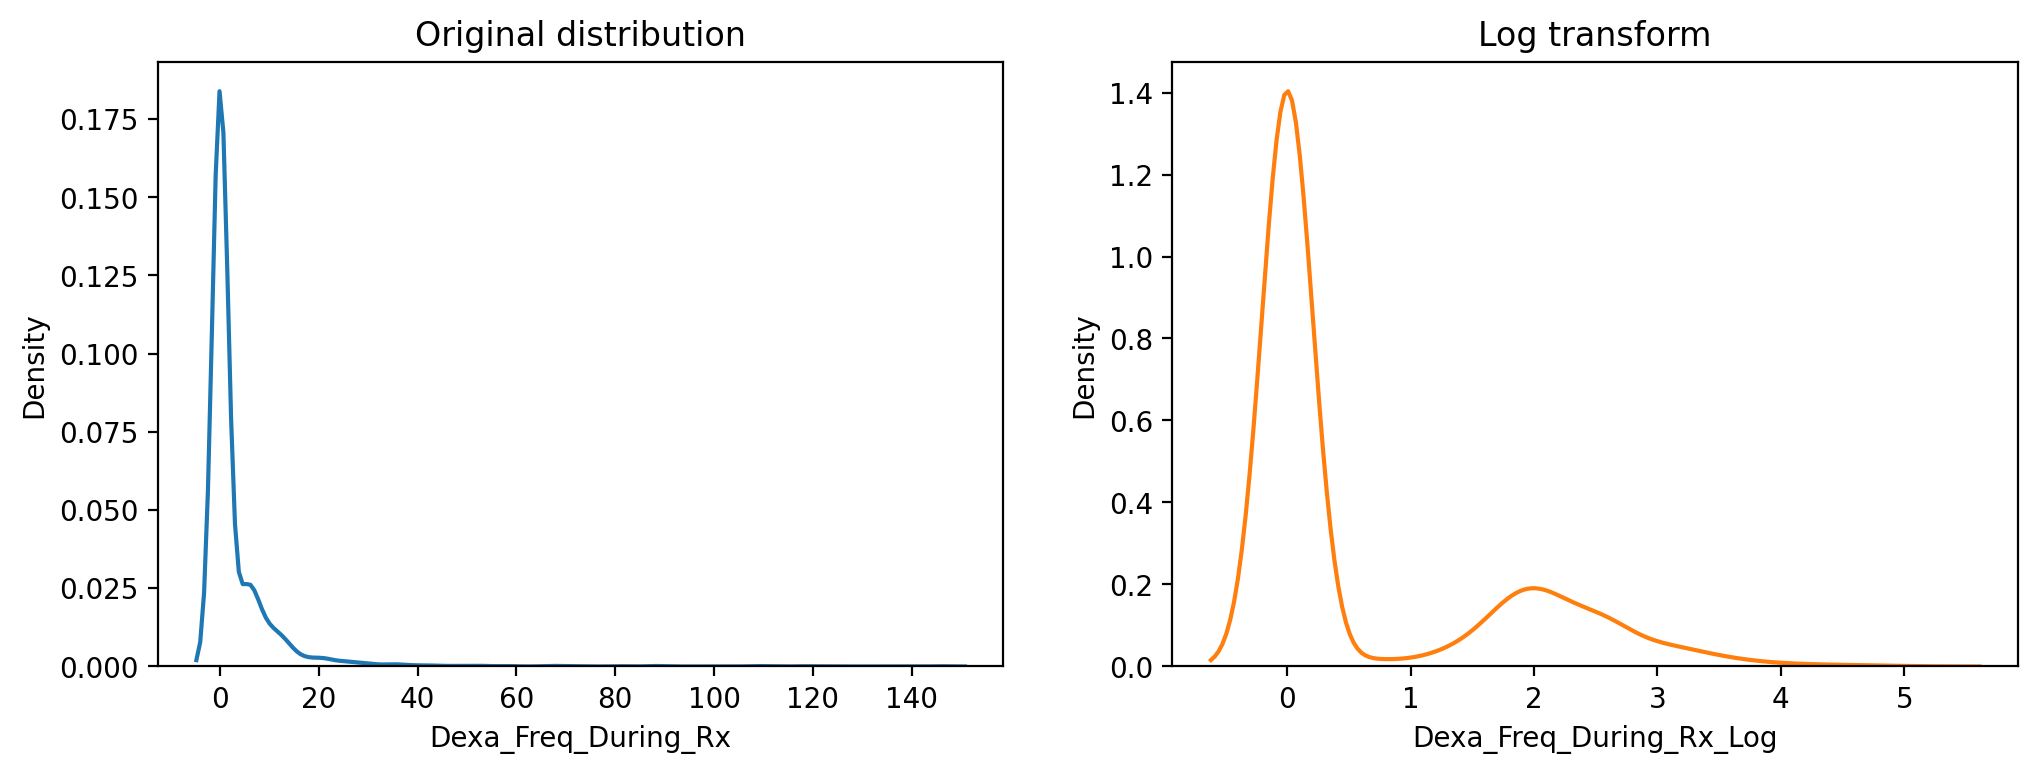

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((12,4))
fig.set_dpi(200)
sns.kdeplot(x=df["Dexa_Freq_During_Rx"],ax=axes[0],color="tab:blue")
sns.kdeplot(x=df["Dexa_Freq_During_Rx_Log"],color="tab:orange");
axes[0].set_title("Original distribution")
axes[1].set_title("Log transform");

<AxesSubplot:xlabel='Dexa_Freq_During_Rx_Log'>

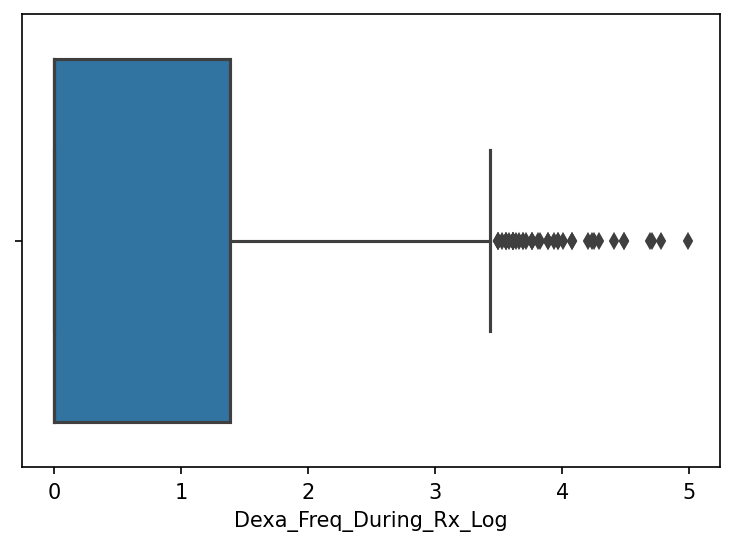

In [12]:
#Box plot for the log transform data
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x=df['Dexa_Freq_During_Rx_Log'])

In [13]:
print(skew(df['Dexa_Freq_During_Rx_Log']))


1.4052436284675567


The skewness has been greatly improved using log transformation

In [14]:
print(skew(df['Count_Of_Risks']))


0.8794050541279611


A posite skewness is being observed. Lets visualize this column

<AxesSubplot:xlabel='Count_Of_Risks'>

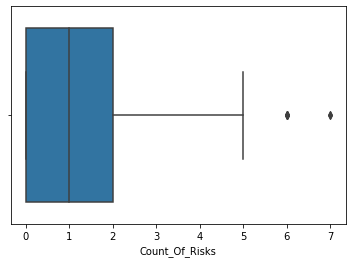

In [15]:
sns.boxplot(x=df['Count_Of_Risks'])

Let's try replacing our outliers with the median

In [16]:
median = df.loc[df['Count_Of_Risks'] <5, 'Count_Of_Risks'].median()
df.loc[df.Count_Of_Risks > 5, 'Count_Of_Risks'] = np.nan
df.fillna(median,inplace=True)
print(skew(df['Count_Of_Risks']))


0.7359181096502345


skewness has been reduce a little by replacing the outlier values with the median

#### Categorical values

We will detect outliers by finding categories that have low frequencies with the help of histograms

In [17]:
#Create a list of categorical columns
cat_cols=df.select_dtypes("object").drop("Ptid",axis=1).columns
#Create a list of categorical columns with outliers
cat_cols_outliers = cat_cols[[any(df[col].value_counts()<=10) for col in cat_cols]] 

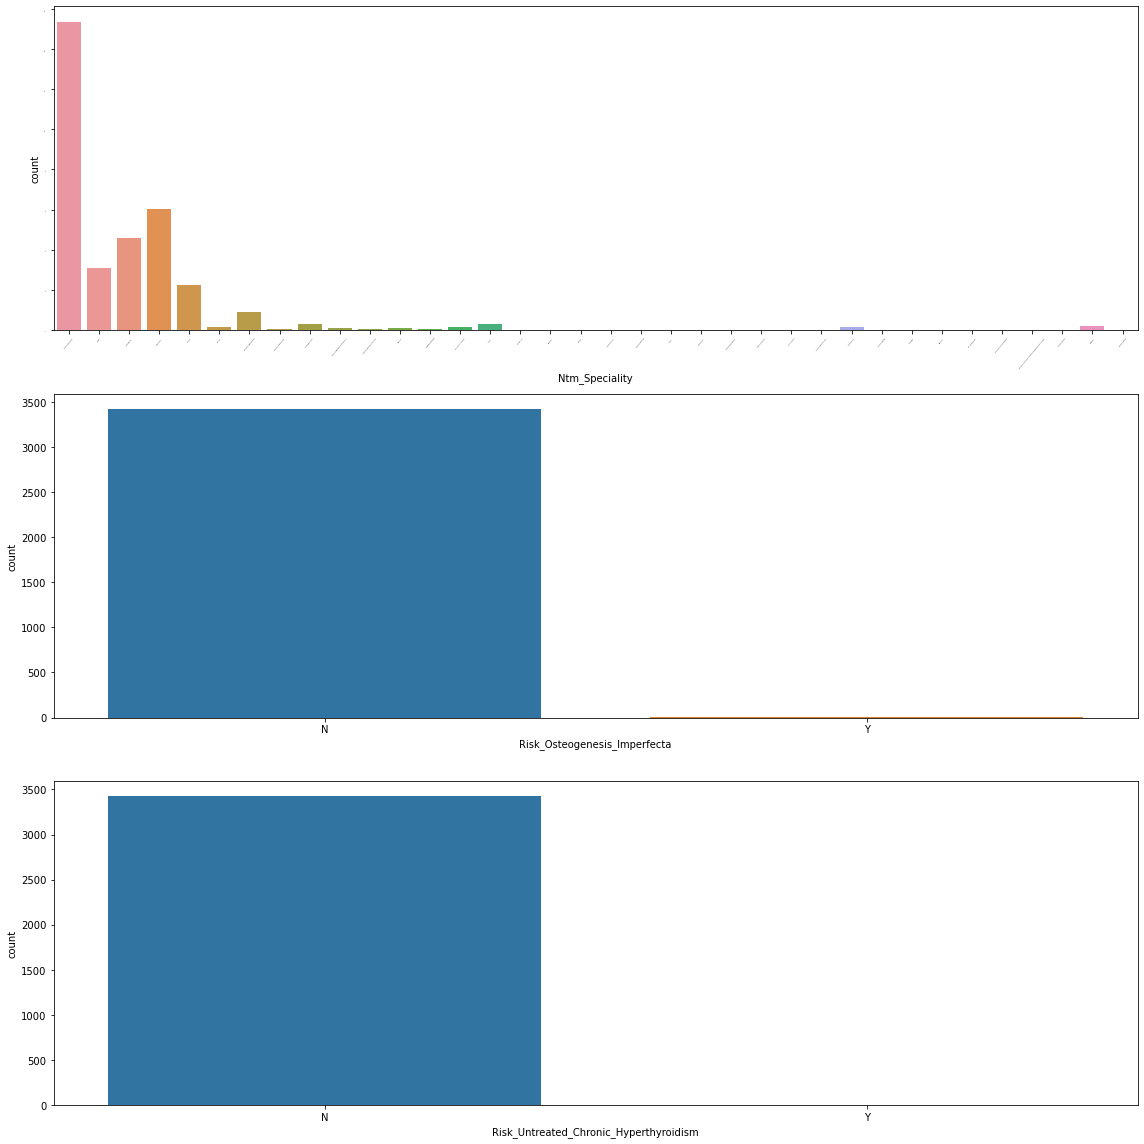

In [18]:
#Visualize the imbalance of categorical columns with outliers
fig,axes=plt.subplots(nrows=len(cat_cols_outliers))
fig.set_size_inches((16,4*4))
i=0
for col in cat_cols_outliers:
    sns.countplot(x=df[col],ax=axes[i])
    i+=1
axes[0].tick_params(rotation=50,labelsize=0)
plt.tight_layout()

Now let's retain these categogories and see how it'll affect the model

## Feature scaling and transformation

### Numerical values

We Have already scaled our 'Dexa_Freq_During_Rx_Log' using log Transformation in order to reduce outliers and minimize skewness.
For the attribute "Count_Of_Risks", we will categorize our values in the following bins: Low Risk, Medium Risk and High Risk

<AxesSubplot:xlabel='Count_Of_Risks_Binned', ylabel='Count'>

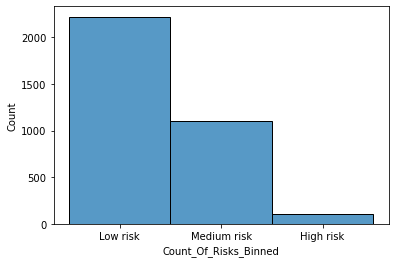

In [19]:
Risk_Bins = np.linspace(min(df['Count_Of_Risks']), max(df['Count_Of_Risks']), 4)
group_names = ["Low risk", "Medium risk", "High risk"]
df['Count_Of_Risks_Binned'] = pd.cut(df['Count_Of_Risks'], Risk_Bins, labels = group_names, include_lowest = True)
sns.histplot(x=df['Count_Of_Risks_Binned'])

### Categorical values
We have both nominal and ordinal data in our dataset. We will be using ordinal encoding on our ordinal data and frequency encoding on our noiminal data.

In [20]:
print(cat_cols)

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_D

After going through the dataset, I have found the following ordinal columns:
- 'Age_Bucket'
- 'Tscore_Bucket_Prior_Ntm'
- 'Tscore_Bucket_During_Rx'

In [21]:
# Importing ordinal encoder
data_categorical = df[cat_cols]
from sklearn.preprocessing import OrdinalEncoder
Age_column = data_categorical[["Age_Bucket"]]
encoder = OrdinalEncoder()
Age_encoded = encoder.fit_transform(Age_column)
Age_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [3.],
       [0.],
       [1.]])

In [22]:
Tscore_Bucket_Prior_Ntm_column = data_categorical[["Tscore_Bucket_Prior_Ntm"]]
encoder = OrdinalEncoder()
Tscore_Bucket_Prior_Ntm_encoded = encoder.fit_transform(Tscore_Bucket_Prior_Ntm_column)
Tscore_Bucket_Prior_Ntm_encoded

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [23]:
Tscore_Bucket_During_Rx_column = data_categorical[["Tscore_Bucket_During_Rx"]]
encoder = OrdinalEncoder()
Tscore_Bucket_During_Rx_encoded = encoder.fit_transform(Tscore_Bucket_During_Rx_column)
Tscore_Bucket_During_Rx_encoded

array([[0.],
       [2.],
       [0.],
       ...,
       [0.],
       [2.],
       [2.]])

In [24]:
df["Age_encoded"] = Age_encoded
df["Tscore_Bucket_Prior_Ntm_encoded"] = Tscore_Bucket_Prior_Ntm_encoded
df["Tscore_Bucket_During_Rx_encoded"] = Tscore_Bucket_During_Rx_encoded

Now for the Nominal colums

In [25]:
df_nominal = data_categorical.drop(["Tscore_Bucket_During_Rx", "Tscore_Bucket_Prior_Ntm", "Age_Bucket"], axis = 1)

In [26]:
# Using frequency encoding
for column in df_nominal:
    Freq_enc = (df_nominal.groupby(column).size()) / len(df)
    print(Freq_enc)

Persistency_Flag
Non-Persistent    0.62354
Persistent        0.37646
dtype: float64
Gender
Female    0.943341
Male      0.056659
dtype: float64
Race
African American    0.027745
Asian               0.024533
Caucasian           0.919393
Other/Unknown       0.028329
dtype: float64
Ethnicity
Hispanic        0.028621
Not Hispanic    0.944801
Unknown         0.026577
dtype: float64
Region
Midwest          0.403914
Northeast        0.067757
Other/Unknown    0.017523
South            0.364194
West             0.146612
dtype: float64
Ntm_Speciality
CARDIOLOGY                                                        0.006425
CLINICAL NURSE SPECIALIST                                         0.000292
EMERGENCY MEDICINE                                                0.000292
ENDOCRINOLOGY                                                     0.133762
GASTROENTEROLOGY                                                  0.000584
GENERAL PRACTITIONER                                              0.448306
GER

In [27]:
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Dexa_Freq_During_Rx_Log,Count_Of_Risks_Binned,Age_encoded,Tscore_Bucket_Prior_Ntm_encoded,Tscore_Bucket_During_Rx_encoded
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,0.0,0.0,Low risk,3.0,1.0,0.0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,0.0,0.0,Low risk,0.0,1.0,2.0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,2.0,0.0,Medium risk,1.0,0.0,0.0
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,1.0,0.0,Low risk,3.0,1.0,0.0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,1.0,0.0,Low risk,3.0,0.0,2.0
